In [ ]:
!pip install matplotlib mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 2.6 MB/s eta 0:00:00


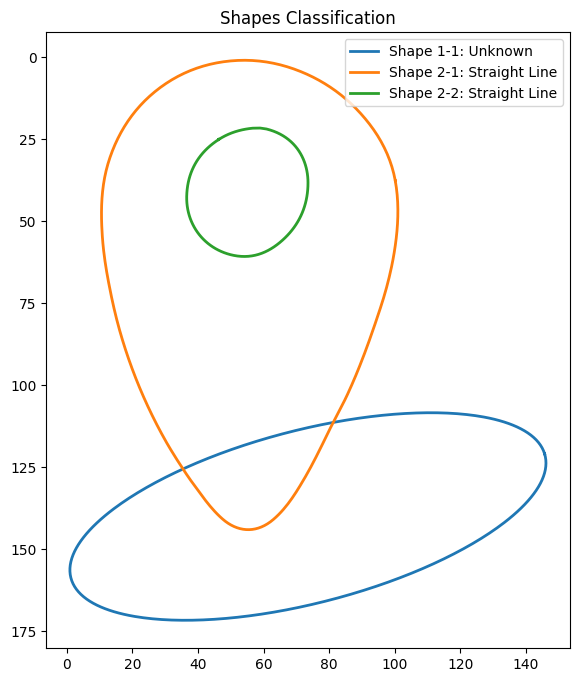

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs
def classify_shapes(path_XYs):
    shapes = []
    for path in path_XYs:
        num_points = len(path)

        if num_points == 2:
            shapes.append("Straight Line")
        elif num_points >= 6:
            shapes.append("Complex Shape")
        else:
            shapes.append("Unknown")

    return shapes
def visualize_and_output(path_XYs, shapes, image_filename='plot.png'):
    fig, ax = plt.subplots(figsize=(8, 8))

    for i, path in enumerate(path_XYs):
        for j, subpath in enumerate(path):
            if shapes[i] == "Straight Line":
                ax.plot(subpath[:, 0], subpath[:, 1], label=f"Shape {i+1}-{j+1}: Straight Line", linewidth=2)
            elif shapes[i] == "Complex Shape":
                ax.plot(subpath[:, 0], subpath[:, 1], label=f"Shape {i+1}-{j+1}: Complex Shape", linewidth=2)
            else:
                ax.plot(subpath[:, 0], subpath[:, 1], label=f"Shape {i+1}-{j+1}: Unknown", linewidth=2)

    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.legend()
    ax.set_title('Shapes Classification')
    ax.grid(False)

    html_fig = mpld3.fig_to_html(fig)

    with open('o.html', 'w') as f:
        f.write(html_fig)

    fig.savefig(image_filename, bbox_inches='tight')

    plt.show()

    plt.close(fig)

csv_path = "/content/occlusion1_sol.csv"
path_XYs = read_csv(csv_path)
shapes = classify_shapes(path_XYs)
visualize_and_output(path_XYs, shapes, image_filename='plot.png')
